<a href="https://colab.research.google.com/github/meghagupta11/SBSPS-Challenge-4458-Sentiment-Analysis-of-COVID-19/blob/master/Anger_BERT_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using Colab GPU for training

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
!pip install transformers


     |████████████████████████████████| 778kB 8.3MB/s 
     |████████████████████████████████| 1.1MB 22.9MB/s 
     |████████████████████████████████| 890kB 51.8MB/s 
     |████████████████████████████████| 3.0MB 23.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=8f0784d71abecf25376cfb612ddd56138ab9a206ca2fed552ce38a42ceb0f9c4
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


##Loading Training dataset

In [ ]:
import numpy as np
import pandas as pd
import os



In [ ]:
from google.colab import files
uploaded = files.upload()



Saving anger-training-github-small.csv to anger-training-github-small.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['anger-training-github-small.csv']))
# Dataset is now stored in a Pandas Dataframe

print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.head(10)  




Number of training sentences: 1,571



,Unnamed: 0,text,timestamp,clean_text,pred_anger
0,0,Coronavirus has wiped more than 3% off the val...,2020-02-24 23:27:22,Coronavirus has wiped more than 3% off the val...,0
1,1,"I gasped cuz at first I read, ""Do you believe...",2020-02-24 23:07:43,"I gasped cuz at first I read, ""Do you believe...",0
2,2,All Aboard The Blessed Trump Train!\r\n\r\n#A1...,2020-03-01 23:47:43,All Aboard The Blessed Trump Train!\r\n\r\n#A1...,0
3,3,SXSW Cancels Film And Music Festival Amid Coro...,2020-03-07 23:39:02,SXSW Cancels Film And Music Festival Amid Coro...,0
4,4,Health care workers worry about coronavirus pr...,2020-03-05 23:57:25,Health care workers worry about coronavirus pr...,0
5,5,Apple decides not to attend 2020 South by Sout...,2020-03-05 23:50:01,Apple decides not to attend 2020 South by Sout...,0
6,6,Dow Sinks After Federal Reserve Rate Cut To Ea...,2020-03-03 23:54:58,Dow Sinks After Federal Reserve Rate Cut To Ea...,0
7,7,maybe coronavirus will be less picky,2020-02-21 21:56:45,maybe coronavirus will be less picky,0
8,8,Trump Weekends in Florida as Fear of the Coron...,2020-03-07 23:55:36,Trump Weekends in Florida as Fear of the Coron...,0
9,9,Whoa. Actual medical facts? And presented by a...,2020-02-26 23:56:28,Whoa. Actual medical facts? And presented by a...,1


In [ ]:
fear = df[['text','pred_anger']]


fear.head(10)

,text,pred_anger
0,Coronavirus has wiped more than 3% off the val...,0
1,"I gasped cuz at first I read, ""Do you believe...",0
2,All Aboard The Blessed Trump Train!\r\n\r\n#A1...,0
3,SXSW Cancels Film And Music Festival Amid Coro...,0
4,Health care workers worry about coronavirus pr...,0
5,Apple decides not to attend 2020 South by Sout...,0
6,Dow Sinks After Federal Reserve Rate Cut To Ea...,0
7,maybe coronavirus will be less picky,0
8,Trump Weekends in Florida as Fear of the Coron...,0
9,Whoa. Actual medical facts? And presented by a...,1


In [ ]:
sentences = fear.text.values
labels = fear.pred_anger.values

##Tokenization and Input Formatting

##BERT Tokenizer

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


Loading BERT tokenizer...


In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  Coronavirus has wiped more than 3% off the value of global stock markets. As well as the risk to life, there is now a real risk that this has a profoundly damaging effect on the global economy. Brexit may well be the very least of our problems right now.
https://www.google.com/amp/s/amp.cnn.com/cnn/2020/02/23/business/stock-futures-coronavirus/index.html …
Tokenized:  ['corona', '##virus', 'has', 'wiped', 'more', 'than', '3', '%', 'off', 'the', 'value', 'of', 'global', 'stock', 'markets', '.', 'as', 'well', 'as', 'the', 'risk', 'to', 'life', ',', 'there', 'is', 'now', 'a', 'real', 'risk', 'that', 'this', 'has', 'a', 'profoundly', 'damaging', 'effect', 'on', 'the', 'global', 'economy', '.', 'br', '##ex', '##it', 'may', 'well', 'be', 'the', 'very', 'least', 'of', 'our', 'problems', 'right', 'now', '.', 'https', ':', '/', '/', 'www', '.', 'google', '.', 'com', '/', 'amp', '/', 's', '/', 'amp', '.', 'cnn', '.', 'com', '/', 'cnn', '/', '2020', '/', '02', '/', '23', '/', 'busines

##Sentence to IDs


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent,  # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                              )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  Coronavirus has wiped more than 3% off the value of global stock markets. As well as the risk to life, there is now a real risk that this has a profoundly damaging effect on the global economy. Brexit may well be the very least of our problems right now.
https://www.google.com/amp/s/amp.cnn.com/cnn/2020/02/23/business/stock-futures-coronavirus/index.html …
Token IDs: [101, 21887, 23350, 2038, 8342, 2062, 2084, 1017, 1003, 2125, 1996, 3643, 1997, 3795, 4518, 6089, 1012, 2004, 2092, 2004, 1996, 3891, 2000, 2166, 1010, 2045, 2003, 2085, 1037, 2613, 3891, 2008, 2023, 2038, 1037, 28089, 15011, 3466, 2006, 1996, 3795, 4610, 1012, 7987, 10288, 4183, 2089, 2092, 2022, 1996, 2200, 2560, 1997, 2256, 3471, 2157, 2085, 1012, 16770, 1024, 1013, 1013, 7479, 1012, 8224, 1012, 4012, 1013, 23713, 1013, 1055, 1013, 23713, 1012, 13229, 1012, 4012, 1013, 13229, 1013, 12609, 1013, 6185, 1013, 2603, 1013, 2449, 1013, 4518, 1011, 17795, 1011, 21887, 23350, 1013, 5950, 1012, 16129, 1529, 102]


##Padding and Trunking

In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  275


In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
MAX_LEN = 280

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 280 values...

Padding token: "[PAD]", ID: 0

Done.


Using TensorFlow backend.


##Attension Masks


In [ ]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

##Train/Validation Split

In [ ]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                            random_state=1999, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                              random_state=1999, test_size=0.1)

##Converting to PyTorch DataTypes

In [ ]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


##Modelling


In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2,    
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

model.cuda()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

##Set Optimizer and Learning Rate

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate 
                  eps = 1e-8 # args.adam_epsilon  
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                       num_warmup_steps = 0, # Default value in run_glue.py
                       num_training_steps = total_steps)

##Training Loop

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of     89.    Elapsed: 0:00:31.
  Batch    80  of     89.    Elapsed: 0:01:03.

  Average training loss: 0.49
  Training epcoh took: 0:01:10

Running Validation...
  Accuracy: 0.82
  Validation took: 0:00:03

======== Epoch 2 / 4 ========
Training...
  Batch    40  of     89.    Elapsed: 0:00:32.
  Batch    80  of     89.    Elapsed: 0:01:04.

  Average training loss: 0.23
  Training epcoh took: 0:01:11

Running Validation...
  Accuracy: 0.84
  Validation took: 0:00:03

======== Epoch 3 / 4 ========
Training...
  Batch    40  of     89.    Elapsed: 0:00:32.
  Batch    80  of     89.    Elapsed: 0:01:04.

  Average training loss: 0.08
  Training epcoh took: 0:01:11

Running Validation...
  Accuracy: 0.88
  Validation took: 0:00:03

======== Epoch 4 / 4 ========
Training...
  Batch    40  of     89.    Elapsed: 0:00:32.
  Batch    80  of     89.    Elapsed: 0:01:04.

  Average training loss: 0.02
  Training epcoh took: 0:01:11

Ru

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


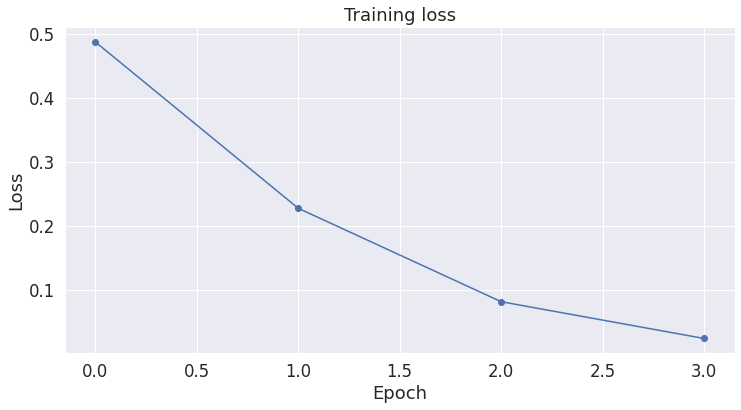

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

##Perform on Test

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving anger-testing-github-lite.csv to anger-testing-github-lite.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['anger-testing-github-lite.csv']))
# Dataset is now stored in a Pandas Dataframe

print('Number of training sentences: {:,}\n'.format(df.shape[0]))
anger = df[['clean_text','pred_anger']]
anger.sample(10) 


Number of training sentences: 1,546



,clean_text,pred_anger
1496,BBC News - Coronavirus: Germany tightens curbs...,1
543,Health News 5 Ways To Help Your Local Communit...,0
1269,Please please let us know when the corona viru...,1
528,Lil Nas X and Megan Thee Stallion offer fans f...,0
1094,Engineered #COVID19 theory is troubling in so ...,0
807,I’m so sick of hearing about the corona virus ...,0
1525,Can you even imagine the effect of the #Corona...,0
1506,#coronavirus => #Italy .\r\n\r\nPrime Minister...,0
1204,We stand by Italy during these trying times. S...,0
1174,Fauci tempers Trump's optimism on chloroquine ...,0


In [ ]:
# Create sentence and label lists
sentences = anger.clean_text.values
labels = anger.pred_anger.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 
# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 16  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 1,546 test sentences...
    DONE.


In [ ]:
print('Positive samples: %d of %d (%.2f%%)' % (anger.pred_anger.sum(), len(anger.pred_anger), (anger.pred_anger.sum() / len(anger.pred_anger) * 100.0)))

Positive samples: 358 of 1546 (23.16%)


In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

MCC: 0.737


In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./model_save/


('./model_save/vocab.txt',
 './model_save/special_tokens_map.json',
 './model_save/added_tokens.json')

In [ ]:
# Mount Google Drive to this Notebook instance.
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
'''
# Load a trained model and vocabulary that you have fine-tuned
model = model_class.from_pretrained(output_dir)
tokenizer = tokenizer_class.from_pretrained(output_dir)

# Copy the model to the GPU.
model.to(device)
'''

##Output Results


In [ ]:
frames = [flat_true_labels, flat_predictions]
table = pd.DataFrame(frames)
results = table.T
results.columns =['True', 'Pred'] 
results.head()

,True,Pred
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1


In [ ]:
table_to_save = anger.merge(results, left_index=True, right_index=True)
table_to_save.to_csv('testing_data_results.csv')

##Labelling other data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset_april3.csv to Dataset_april3.csv


In [ ]:
import io
#import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Dataset_april3.csv']))
# Dataset is now stored in a Pandas Dataframe

print('Number of unlabeled sentences: {:,}\n'.format(df.shape[0]))
anger = df[['created_at','text']]
# Display 10 random rows from the data.
anger.head(10)  

Number of unlabeled sentences: 15,000



,created_at,text
0,Tue Apr 21 11:31:58 +0000 2020,"RT @PARInetwork: 3/ ""When there is no food, pe..."
1,Tue Apr 21 06:50:59 +0000 2020,Adopt social distancing as a life style till t...
2,Tue Apr 21 09:18:34 +0000 2020,RT @ProfAkinAbayomi: ☑️The second death involv...
3,Tue Apr 21 13:25:06 +0000 2020,RT @ayinoptions: So the phrase should really g...
4,Tue Apr 21 22:16:45 +0000 2020,RT @JoeNBC: MEMO TO PRESIDENT from your CDC Di...
5,Tue Apr 21 21:43:42 +0000 2020,RT @JoeBiden: I know COVID-19 is causing many ...
6,Tue Apr 21 23:26:21 +0000 2020,Why oh why are we beset with evil geniuses fro...
7,Wed Apr 22 04:44:14 +0000 2020,"RT @MediaActive: Meanwhile, in the South China..."
8,Wed Apr 22 01:12:43 +0000 2020,"RT @CMC_MarineCorps: Marines, the PFT requirem..."
9,Tue Apr 21 19:44:39 +0000 2020,"RT @MelissaJPeltier: So, Dan Patrick is volunt..."


In [ ]:
sentences = anger.text.values
# labels = sadness.sadness.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  157


In [ ]:
# Create sentence and label lists
sentences = anger.text.values
# labels = sadness.sadness.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

MAX_LEN = 160
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
# prediction_labels = torch.tensor(labels)
# Set the batch size.  
batch_size = 16  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions  = []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  # label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  # true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 15,000 test sentences...
    DONE.


In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

In [ ]:
table1 = pd.DataFrame(flat_predictions)
table1.columns = ['anger_output']
df1 = df[[ 'created_at', 'text']]

In [ ]:
pred_output1 = df1.merge(table1,left_index=True, right_index=True)
pred_output1.to_csv('Bert_apr3_anger.csv')
pred_output1.sample(10)

,created_at,text,anger_output
14990,Thu Apr 30 18:57:28 +0000 2020,Abolish The Middlemen! #MedicareForAll https:/...,1
8685,Sun Apr 26 19:50:16 +0000 2020,@Joy997FM I will suggest to government to mak...,0
9361,Mon Apr 27 21:04:06 +0000 2020,RT @SarahLudford: “do worst-performing leaders...,1
10396,Mon Apr 27 18:19:40 +0000 2020,RT @BioTalentCanada: We continue to support em...,0
6342,Sat Apr 25 10:34:30 +0000 2020,@allisonpearson @Tothemo83592350 Out of curios...,1
14241,Thu Apr 30 11:39:36 +0000 2020,"RT @ndtv: #Watch | ""Number of #coronavirus cas...",0
3816,Thu Apr 23 14:24:29 +0000 2020,RT @theRealKiyosaki: WILL GETTING BACK TO WORK...,0
5736,Fri Apr 24 09:42:27 +0000 2020,RT @pbhushan1: Must read:What was evident is n...,0
2705,Wed Apr 22 07:45:09 +0000 2020,RT @block_per: With complete or near-complete ...,0
1156,Tue Apr 21 09:58:40 +0000 2020,RT @JamesHasson20: He got in an altercation wi...,1


In [ ]:
len(pred_output1)

15000